# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial'

In [4]:
print('Beginning Data Retrieval')
print('------------------------------')
records = 1
set_count = 1

for counter, city in enumerate(cities,1):
    if (counter%50==0 and counter>=50):
        set_count += 1
        records = 1
    print(f'Processing Record {records} of set {set_count} | {city}')
    try:
        query_url = f'{base_url}&q={city}'
        response = requests.get(query_url).json()
        
    except:
        print(f'City not found. Skipping...')
        pass

Beginning Data Retrieval
------------------------------
Processing Record 1 | kavaratti
Processing Record 2 | hobart
Processing Record 3 | rikitea
Processing Record 4 | pakokku
Processing Record 5 | kodiak
Processing Record 6 | chokurdakh
Processing Record 7 | yellowknife
Processing Record 8 | najran
Processing Record 9 | sao jose da coroa grande
Processing Record 10 | norman wells
Processing Record 11 | new norfolk
Processing Record 12 | champerico
Processing Record 13 | hihifo
Processing Record 14 | san cristobal
Processing Record 15 | ushuaia
Processing Record 16 | busselton
Processing Record 17 | yar-sale
Processing Record 18 | bilibino
Processing Record 19 | east london
Processing Record 20 | taitung
Processing Record 21 | ukiah
Processing Record 22 | zhigansk
Processing Record 23 | ribeira grande
Processing Record 24 | chitral
Processing Record 25 | zyryanka
Processing Record 26 | saint george
Processing Record 27 | mataura
Processing Record 28 | heihe
Processing Record 29 | khat

Processing Record 247 | khor
Processing Record 248 | chuncheng
Processing Record 249 | resavica
Processing Record 250 | batticaloa
Processing Record 251 | komsomolskiy
Processing Record 252 | grindavik
Processing Record 253 | cockburn town
Processing Record 254 | teya
Processing Record 255 | winneba
Processing Record 256 | vao
Processing Record 257 | amderma
Processing Record 258 | nyamuswa
Processing Record 259 | north myrtle beach
Processing Record 260 | liangxiang
Processing Record 261 | fort collins
Processing Record 262 | rawson
Processing Record 263 | the valley
Processing Record 264 | tsnori
Processing Record 265 | kruisfontein
Processing Record 266 | ryotsu
Processing Record 267 | bethel
Processing Record 268 | labuhan
Processing Record 269 | college
Processing Record 270 | bridlington
Processing Record 271 | sangmelima
Processing Record 272 | jati
Processing Record 273 | poum
Processing Record 274 | gornopravdinsk
Processing Record 275 | dodge city
Processing Record 276 | muis

Processing Record 493 | ambatofinandrahana
Processing Record 494 | alice springs
Processing Record 495 | shimoda
Processing Record 496 | balkanabat
Processing Record 497 | honiara
Processing Record 498 | phan thiet
Processing Record 499 | koumac
Processing Record 500 | dingle
Processing Record 501 | mergui
Processing Record 502 | utiroa
Processing Record 503 | kenai
Processing Record 504 | lumeje
Processing Record 505 | bairiki
Processing Record 506 | kaeo
Processing Record 507 | grand-lahou
Processing Record 508 | axim
Processing Record 509 | biarritz
Processing Record 510 | jamsa
Processing Record 511 | bousso
Processing Record 512 | clearlake
Processing Record 513 | jacmel
Processing Record 514 | lydenburg
Processing Record 515 | baykit
Processing Record 516 | barra patuca
Processing Record 517 | meulaboh
Processing Record 518 | san andres
Processing Record 519 | ishigaki
Processing Record 520 | abaete
Processing Record 521 | belmonte
Processing Record 522 | beidao
Processing Record

In [ ]:
# Need to figure out how to establish sets of 50 for the cities list above
        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
place = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []

for city in cities:
    try:
        query_url = f'{base_url}&q={city}'
        response = requests.get(query_url).json()
        place.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        pass

In [6]:
d={'City': place,
  'Lat': lat,
  'Lng': lng,
  'Max Temp': max_temp,
  'Humidity': hum,
  'Cloudiness': cloud,
  'Wind Speed': wind,
  'Country': country,
  'Date': date}

weather_data = pd.DataFrame(d)
weather_data.to_csv(output_data_file)
weather_data.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [7]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.57,72.64,81.79,82,100,16.11,IN,1595535366
1,Hobart,-42.88,147.33,39.99,80,77,4.70,AU,1595535395
2,Rikitea,-23.12,-134.97,66.90,63,0,16.89,PF,1595535396
3,Pakokku,21.33,95.10,81.79,72,100,10.71,MM,1595535396
4,Saint Paul Harbor,57.79,-152.41,59.00,62,40,3.36,US,1595535396


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.660089,18.174768,70.088464,69.980357,50.805357,7.807000,1.595535e+09
std,32.710378,90.857312,14.758446,19.858028,38.239332,5.157383,7.735689e+01
min,-54.800000,-175.200000,24.800000,3.000000,0.000000,0.270000,1.595535e+09
25%,-6.905000,-63.855000,59.000000,59.000000,7.750000,3.870000,1.595535e+09
50%,21.080000,21.665000,73.310000,74.000000,51.500000,6.930000,1.595535e+09
75%,45.787500,100.272500,80.600000,85.000000,90.000000,10.290000,1.595535e+09
max,78.220000,179.320000,106.000000,100.000000,100.000000,30.620000,1.595536e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Observations: From the scatter plot below it can be seen the max temperatures are the greatest around 20 deg latitude, which is slightly off the equator. Also it appears, the Northern Hemisphere (greater than 0) has more high temperature cities, it may just be the random sample used.

In [9]:
latitude = weather_data['Lat']

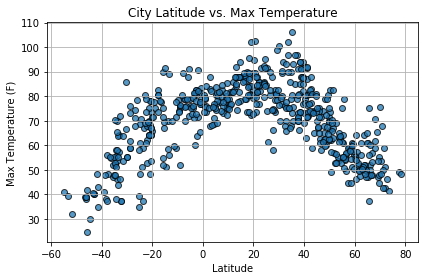

In [10]:
temperature = weather_data['Max Temp']

plt.scatter(latitude,temperature, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid()
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

Observations: According to the scatter plot below, humidity does not have a relationship with latitude. The sample data does contain a lot of cities with mid-high levels of humidity however.

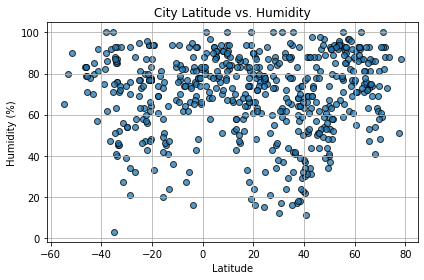

In [11]:
humidity = weather_data['Humidity']

plt.scatter(latitude,humidity, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

Observations: Based on the scatter plot below, it does not appear cloudiness has any relationship with lattitude either. The data points are completely dispersed and show no pattern.

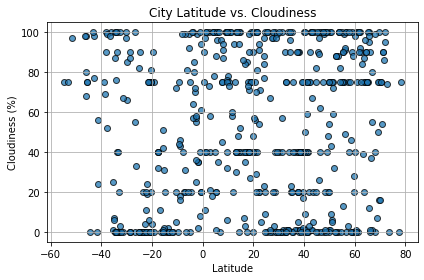

In [12]:
cloudiness = weather_data['Cloudiness']

plt.scatter(latitude,cloudiness, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

Observations: Based on the scatter plot below, it appears the sample data set used contains cities with low-mid windspeeds as majority of the points are below 6mph. However, it is difficult to see any correlation with latitude.

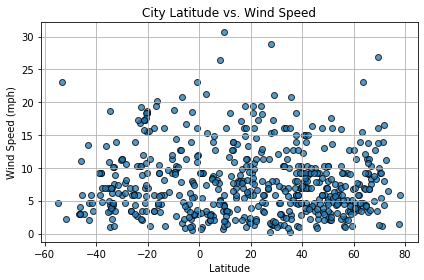

In [13]:
wind_speed = weather_data['Wind Speed']

plt.scatter(latitude,wind_speed, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()
plt.tight_layout()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg (x,y,label,x1,y1):
    """
    :param x: x values to be plotted
    :type x: list/series
    :param y: y values to be plotted
    :type y: list/series
    :param label: y label on plot
    :type label: string
    :param x1: x location of the regression line equation annotation on plot
    :type x1: integer
    :param y1: y location of the regression line equation annotation on plot
    :type y1: integer
    
    :example: 
    
    lin_reg(N_lat,N_temp,'Max Temperature (F)', 0, 280)
    
    """
   
    
    plt.scatter(x,y, edgecolors='black', alpha=0.75)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, 'r-')
    print(f'The r-squared value is {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(x1,y1),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(label)
    plt.grid()
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
N_hem = weather_data.loc[weather_data['Lat']>=0]
S_hem = weather_data.loc[weather_data['Lat']<0]

In [16]:
N_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.57,72.64,81.79,82,100,16.11,IN,1595535366
3,Pakokku,21.33,95.10,81.79,72,100,10.71,MM,1595535396
4,Saint Paul Harbor,57.79,-152.41,59.00,62,40,3.36,US,1595535396
5,Chokurdakh,70.63,147.92,68.07,59,54,5.48,RU,1595535364
6,Yellowknife,62.46,-114.35,61.00,87,90,13.87,CA,1595535186


In [17]:
# x values used for the Northern and Southern Hemisphere plots.
N_lat = N_hem['Lat']
S_lat = S_hem['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Observations: Based on the linear regression below, it can be seen that there is a negative correlation between temperature and latitude. In other words, as your latitude increases (you are moving away from the Equator towards the North Pole), your temperature drops. The results are intuitive and make sense.

The r-squared value is -0.6961990386453107


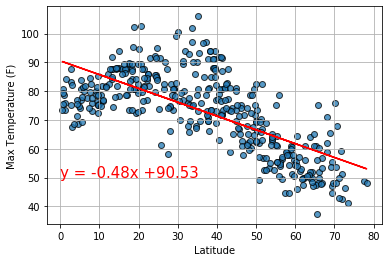

In [19]:
N_temp = N_hem['Max Temp']

lin_reg(N_lat,N_temp,'Max Temperature (F)',0,50)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Observations: Based on the linear regression below, it is possible to see a positive correlation. As the latitude increases (moving closer to the Equator from the South Pole), the temperatures rise. Again, this is also intuitive and makes sense.

The r-squared value is 0.7579462259489554


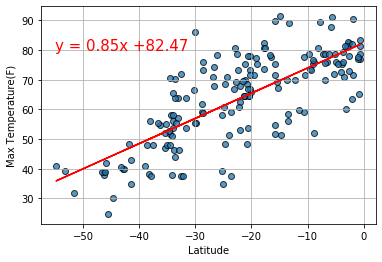

In [21]:
S_temp = S_hem['Max Temp']

lin_reg(S_lat,S_temp,'Max Temperature(F)',-55,80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Observations: According to the linear regression, there appears to be close to no correlation between the latitude and humidity, which is what was predicted earlier.

The r-squared value is 0.010736151706142958


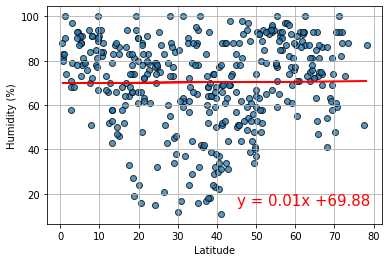

In [24]:
N_hum = N_hem['Humidity']

lin_reg(N_lat,N_hum,'Humidity (%)',45,15)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Observations: There appears to be a slight negative correlation in the Southern Hemisphere between latitude and humidity. As the Equator is approached, the humidity drops slightly.

The r-squared value is -0.059595883791431284


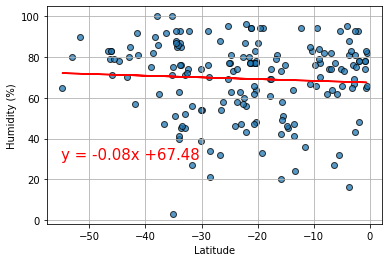

In [27]:
S_hum = S_hem['Humidity']

lin_reg(S_lat,S_hum,'Humidity (%)',-55,30)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Observations: In the Northern Hemisphere, there seems to be barely any correlation between latitude and cloudiness. The data is evenly distributed across.

The r-squared value is -0.028734052260272532


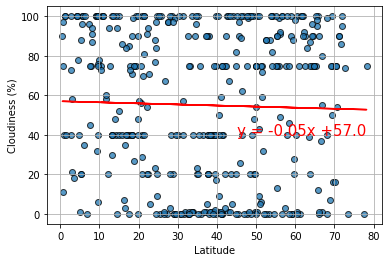

In [28]:
N_cloud = N_hem['Cloudiness']

lin_reg(N_lat,N_cloud,'Cloudiness (%)',45,40)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Observations: In the Southern Hemisphere, there is a slight negative correlation with latitude and cloudiness. The closer to the Equator, the lower the cloudiness.

The r-squared value is -0.11337891868289633


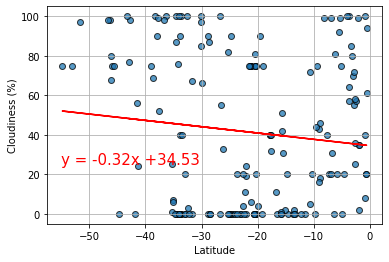

In [29]:
S_cloud = S_hem['Cloudiness']

lin_reg(S_lat,S_cloud,'Cloudiness (%)',-55,25)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Observations: There appears to be no relationship between latitude and wind speed in the Northern Hemisphere.

The r-squared value is -0.04101416149902206


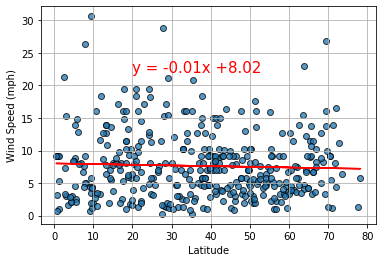

In [32]:
N_wind = N_hem['Wind Speed']

lin_reg(N_lat,N_wind,'Wind Speed (mph)',20,22)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Observations: There seems to be a slightly positive correlation between latitude and wind speed in the Southern Hemisphere. The closer to the Equator, the higher the wind speed.

The r-squared value is 0.11263119473732515


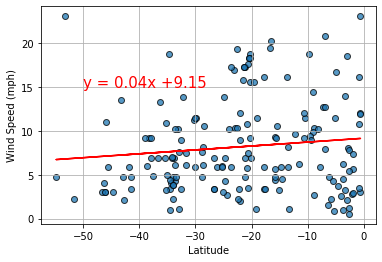

In [34]:
S_wind = S_hem['Wind Speed']

lin_reg(S_lat,S_wind,'Wind Speed (mph)',-50,15)